<center style="font-size: 2em; font-weight: bold;"> Estadistica para Economístas </center>
<center style="font-size: 2em; font-weight: bold;"> Semana 2: generacion de data </center>

Aplicacion de base de datos sobre los activos de apple y microsfot corporation

In [1]:
import pandas 
import numpy
import yfinance as yf

#import pandas_datareader as pdr
#from datetime import datetime


In [2]:
# Apple
df_apple = yf.download('AAPL', start='2018-09-15', end='2020-11-15')
print(df_apple.head().T)

## Microsfot
df_msft = yf.download('MSFT', start='2018-09-15', end='2020-11-15')
print(df_msft.head().T)




[*********************100%***********************]  1 of 1 completed
Date         2018-09-17    2018-09-18    2018-09-19    2018-09-20  \
Open       5.553750e+01  5.444750e+01  5.462500e+01  5.506000e+01   
High       5.573750e+01  5.546250e+01  5.490500e+01  5.557000e+01   
Low        5.431750e+01  5.428000e+01  5.382500e+01  5.478750e+01   
Close      5.447000e+01  5.456000e+01  5.459250e+01  5.500750e+01   
Adj Close  5.231047e+01  5.239689e+01  5.242810e+01  5.282664e+01   
Volume     1.487804e+08  1.262868e+08  1.084952e+08  1.064352e+08   

Date         2018-09-21  
Open       5.519500e+01  
High       5.534000e+01  
Low        5.432250e+01  
Close      5.441500e+01  
Adj Close  5.225764e+01  
Volume     3.849868e+08  
[*********************100%***********************]  1 of 1 completed
Date         2018-09-17    2018-09-18    2018-09-19    2018-09-20  \
Open       1.136900e+02  1.121900e+02  1.130500e+02  1.122800e+02   
High       1.137000e+02  1.137000e+02  1.133200e+02  1.138

In [3]:
apple = df_apple[['Adj Close']]
apple.head().T

msft = df_msft[['Adj Close']]
msft.head().T


Date,2018-09-17,2018-09-18,2018-09-19,2018-09-20,2018-09-21
Adj Close,106.702652,107.720795,106.283989,108.063339,108.719872


In [4]:
# Filtramos la informacion
apple['AAPL'] = apple['Adj Close']
apple_precio = apple[['AAPL']]
apple_precio['fecha'] = apple_precio.index
apple_precio.head().T

msft['MSFT'] = msft['Adj Close']
msft_precio = msft[['MSFT']]
msft_precio['fecha'] = msft_precio.index
msft_precio.head().T


C:\Users\edinson\AppData\Local\Temp\ipykernel_4284\1747147882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['AAPL'] = apple['Adj Close']
C:\Users\edinson\AppData\Local\Temp\ipykernel_4284\1747147882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft['MSFT'] = msft['Adj Close']


Date,2018-09-17,2018-09-18,2018-09-19,2018-09-20,2018-09-21
MSFT,106.702652,107.720795,106.283989,108.063339,108.719872
fecha,2018-09-17 00:00:00,2018-09-18 00:00:00,2018-09-19 00:00:00,2018-09-20 00:00:00,2018-09-21 00:00:00


In [5]:
activos = msft_precio 
activos['AAPL'] = apple['AAPL']
activos.head().T

Date,2018-09-17,2018-09-18,2018-09-19,2018-09-20,2018-09-21
MSFT,106.702652,107.720795,106.283989,108.063339,108.719872
fecha,2018-09-17 00:00:00,2018-09-18 00:00:00,2018-09-19 00:00:00,2018-09-20 00:00:00,2018-09-21 00:00:00
AAPL,52.310467,52.396889,52.428104,52.826645,52.257645


In [6]:
# Base final
activos = activos[['fecha', 'MSFT', 'AAPL']]
activos.head().T

Date,2018-09-17,2018-09-18,2018-09-19,2018-09-20,2018-09-21
fecha,2018-09-17 00:00:00,2018-09-18 00:00:00,2018-09-19 00:00:00,2018-09-20 00:00:00,2018-09-21 00:00:00
MSFT,106.702652,107.720795,106.283989,108.063339,108.719872
AAPL,52.310467,52.396889,52.428104,52.826645,52.257645


<AxesSubplot: xlabel='fecha', ylabel='AAPL'>

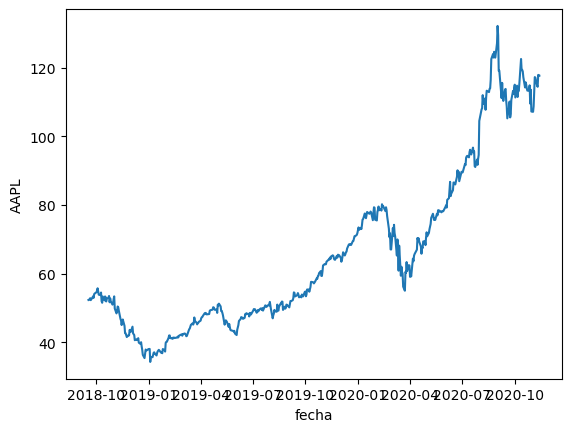

In [7]:
import seaborn

seaborn.lineplot(activos, x='fecha', y='AAPL')

<AxesSubplot: xlabel='fecha', ylabel='MSFT'>

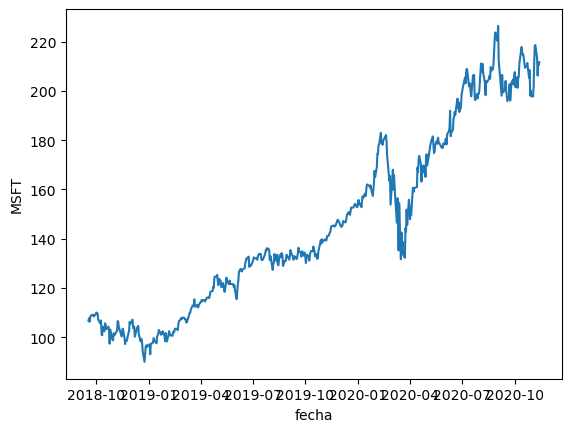

In [8]:
seaborn.lineplot(activos, x='fecha', y='MSFT')

In [9]:
import os
# Exportamos de python to excel
os.chdir("D:/Dropbox/Docencia/UPN/Estadistica/S2/Data")

activos.to_csv("data_semana2_activos.csv")
activos.to_excel("data_semana2_activos.xlsx")
